<a href="https://colab.research.google.com/github/nathanschoeck/Computer-Vision/blob/main/Hough_Transform_Boundary_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here are two different implementations of Hough Transform Boundary Detection using Python. The first method uses the Hough Line Transform for detecting straight lines, and the second method uses the Hough Circle Transform for detecting circular boundaries.

# Method 1: Hough Line Transform

1. Import Libraries

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

2. Load the image in grayscale

In [45]:
image_path = "/bicycle.jpg"  # Replace with your image path
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

3. Check if the image was loaded correctly

In [46]:
if img is None:
    raise FileNotFoundError(f"Image file not found: {image_path}")

4. Apply Canny edge detection

In [47]:
edges = cv2.Canny(img, # greysclae input image
                  550, # lower threshold for edge detection; pixel gradients below this value are considered as non-edges.
                  750, # upper threshold for edge detection; pixel gradients above this value are considered as strong edges
                  apertureSize=3 # size of the Sobel kernel used to calculate image gradients; determines how the intensity gradients are calculated.
                  )

5. Apply Hough Line Transform

In [48]:
lines = cv2.HoughLines(edges,
                       rho=1, # Distance resolution in pixels.
                       theta=np.pi/180, # Angle resolution in radians.
                       threshold=100 # Minimum number of intersections in Hough space to detect a line
                       )

6. Convert the original image to BGR for visualization

In [49]:
output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

7. Draw the detected lines

In [50]:
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * a)
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * a)
        cv2.line(output, (x1, y1), (x2, y2), (0, 255, 0), 2)

8. Display the results

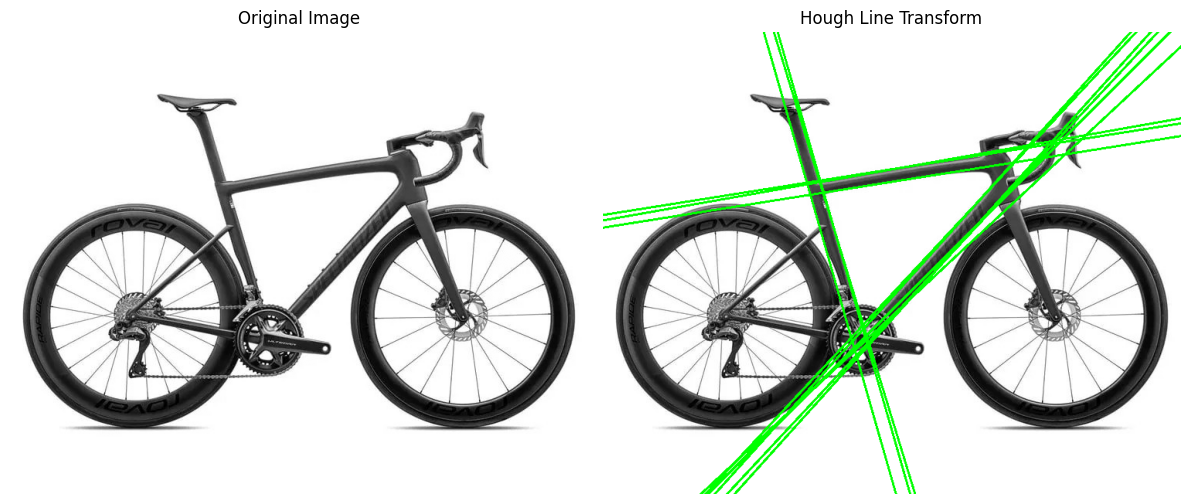

In [51]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(output)
plt.title("Hough Line Transform")
plt.axis("off")

plt.tight_layout()
plt.show()

# Method 2: Hough Circle Transform

9. Apply Hough Circle Transform

In [52]:
circles = cv2.HoughCircles(
    img,
    cv2.HOUGH_GRADIENT,
    dp=1.2,  # Adjusted inverse ratio
    minDist=30,  # Minimum distance between circles
    param1=100,  # Canny edge threshold
    param2=300,  # Accumulator threshold for circle detection
    minRadius=100,  # Minimum radius
    maxRadius=200,  # Maximum radius
)

10. Convert the original image to BGR for visualization

In [53]:
circle_output = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

11. Draw the detected circles

In [54]:
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        center = (circle[0], circle[1])  # Circle center
        radius = circle[2]  # Circle radius
        # Draw the circle center
        cv2.circle(circle_output, center, 2, (0, 255, 0), 3)
        # Draw the circle boundary
        cv2.circle(circle_output, center, radius, (255, 0, 0), 2)

12. Display the results

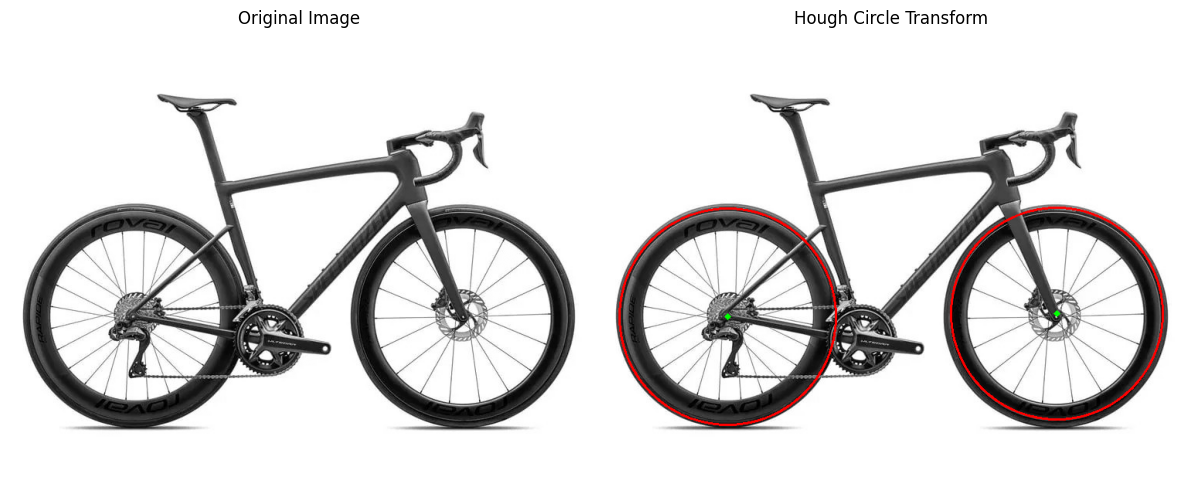

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap="gray")
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(circle_output)
plt.title("Hough Circle Transform")
plt.axis("off")

plt.tight_layout()
plt.show()